## Business Background
Supermarkets face intense competition and need to understand customer behavior to tailor marketing efforts and enhance customer satisfaction. By analyzing detailed customer data on demographics, purchase history, and responses to marketing campaigns, the supermarket aims to segment its customer base and optimize marketing strategies to increase sales and customer loyalty.

# Business Problem
1. Market products and services?
<br><br>
- What products have the highest and lowest sales rate?

2. Segmenting Each Customer based on RFM Score ( Recency, Frequency, Monetary)
- What Category from each segment has a high relation with the amount of products spent?
- Distribution Each segment based by Income

3. Analyze the Supermarket Campaign by Segment related to sales rate?
* How effective the number of campaign received by customers with the level of sales rate of products?
* How effective each campaign batch to each product category revenue?

# Data
* To asnwer the question above, i will analyze the customers data From supermaket

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import plotly.express as px
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('Supermarket Customers.csv',sep='\t' )

display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1



# People:
* ID: Customer's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise
# Products
* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years
# Promotion
* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
# Place
* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalog
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to the company’s website in the last month

# Data Understanding and Cleaning
As a data analyst, we have to know and undestand about the dataset that given to us before we creating some analysis. So, if we found some anomaly we can go to the data cleaning step.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [4]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [5]:
# Converting Dt_Customer to Datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

# Missing Values
We have to know how much the data is null/missing. We have to make decision to drop it or we fix it.

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
#Decision to drop the data null
df.dropna(inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
#Check unique data in every column
uniqueItem = []
for i in df.columns :
    uniqueItem.append([i, df[i].nunique(),df[i].unique()])
unique = pd.DataFrame(columns=['Column Name', 'Number of Unique Item', 'Unique Value'],
                      data=uniqueItem)
unique

,Column Name,Number of Unique Item,Unique Value
0,ID,2216,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,662,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 201..."
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 5..."
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 6, 1..."


# Replace Value and Type

In [9]:
df['Education'] = df['Education'].replace({
    'Graduation' : 'Bachelor',
    'Basic' : 'High School',
    '2n Cycle' : 'Master'
})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Bachelor,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [10]:
df['Marital_Status'].value_counts()

Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [11]:
# Change the column of Marital status
df['Marital_Status'] = df['Marital_Status'].replace({
    'YOLO': 'Single',
    'Absurd' : 'Single',
    'Alone' : 'Single'})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Bachelor,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [12]:
#Rename the columns
df = df.rename(columns = {
    'MntWines': 'MntWines',
    'MntFruits': 'MntFruits',
    'MntMeatProducts' : 'MntMeats',
    'MntFishProducts' : 'MntFish',
    'MntSweetProducts' : 'MntSweets',
    'MntGoldProds' : 'MntGold',
    'AcceptedCmp1' : 'Campaign1',
    'AcceptedCmp2' : 'Campaign2',
    'AcceptedCmp3' : 'Campaign3',
    'AcceptedCmp4' : 'Campaign4',
    'AcceptedCmp5' : 'Campaign5',
    'NumDealsPurchases' : 'Deals',
    'NumWebPurchases' : 'Web',
    'NumCatalogPurchases' : 'Catalog',
    'NumStorePurchases' : 'Store',
    'NumWebVisitsMonth' : 'WebVisit'
})
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeats,MntFish,MntSweets,MntGold,Deals,Web,Catalog,Store,WebVisit,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Bachelor,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


In [13]:
df['Complain'] = df['Complain'].replace({
    0: 'No',
    1: 'Yes'}
)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeats,MntFish,MntSweets,MntGold,Deals,Web,Catalog,Store,WebVisit,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,No,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,No,3,11,0
2,4141,1965,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,No,3,11,0
3,6182,1984,Bachelor,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,No,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,No,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,No,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,No,3,11,0
2237,7270,1981,Bachelor,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,No,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,No,3,11,0


# Check Duplicate Customers

In [14]:
columns_to_check = df.columns[1:].tolist()

#perform the duplicate
duplicates = df.duplicated(subset=columns_to_check,keep=False)


#select rows that are duplicates
duplicate_rows = df[duplicates].sort_values(by=columns_to_check)
duplicate_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeats,MntFish,MntSweets,MntGold,Deals,Web,Catalog,Store,WebVisit,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Z_CostContact,Z_Revenue,Response
39,2968,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,No,3,11,1
894,8800,1943,PhD,Divorced,48948.0,0,0,2013-02-01,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,No,3,11,1
17,4939,1946,Bachelor,Together,37760.0,0,0,2012-08-31,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,No,3,11,0
282,8652,1946,Bachelor,Together,37760.0,0,0,2012-08-31,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,No,3,11,0
182,10562,1946,Master,Married,66835.0,0,0,2013-09-28,21,620,26,195,34,17,141,1,6,4,13,2,0,0,0,0,0,No,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1578,8175,1992,Bachelor,Married,34935.0,0,0,2013-06-21,71,34,4,66,3,10,20,1,2,1,4,7,0,0,0,0,0,No,3,11,0
392,2669,1993,Bachelor,Single,74293.0,0,0,2014-05-04,66,375,152,335,93,91,81,1,5,4,6,2,0,0,0,0,0,No,3,11,0
928,10037,1993,Bachelor,Single,74293.0,0,0,2014-05-04,66,375,152,335,93,91,81,1,5,4,6,2,0,0,0,0,0,No,3,11,0
696,8315,1995,Bachelor,Single,34824.0,0,0,2014-03-26,65,4,2,11,2,0,4,1,1,0,2,6,0,0,0,0,0,No,3,11,0


In [15]:
#Dropping the duplicated rows
df.drop_duplicates(subset=columns_to_check,keep='first',inplace=True,ignore_index=True)

In [16]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeats,MntFish,MntSweets,MntGold,Deals,Web,Catalog,Store,WebVisit,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,No,3,11,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,No,3,11,0
2,4141,1965,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,No,3,11,0
3,6182,1984,Bachelor,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,No,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,No,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,9432,1977,Bachelor,Together,666666.0,1,0,2013-06-02,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,No,3,11,0
2028,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,No,3,11,0
2029,7270,1981,Bachelor,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,No,3,11,0
2030,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,No,3,11,0


# DROP OUTLIER VALUES

In [17]:
df['Income'].describe()

count      2032.000000
mean      52368.671260
std       25536.184914
min        1730.000000
25%       35538.750000
50%       51550.000000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

<Axes: ylabel='Income'>

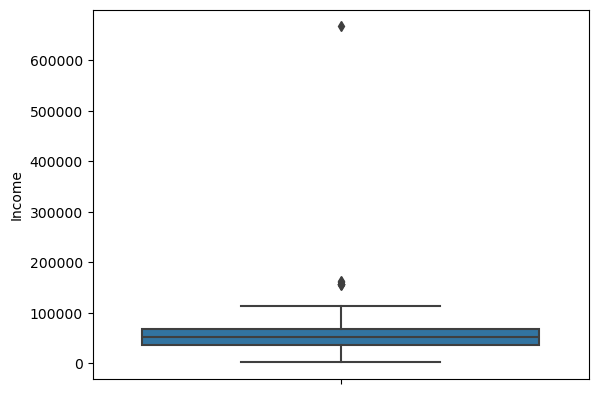

In [18]:
sns.boxplot(data=df,y=df['Income'])

In [19]:
indices_to_drop1 = df[df['Income'] > 600000].index
df = df.drop(indices_to_drop1)

# Remove Columns
Because I didn't use Z Cost Contract and Z Revenue to analyze this data. So I made the decision to delete this column

In [20]:
df = df.drop(['Z_CostContact', 'Z_Revenue'], axis=1)
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeats,MntFish,MntSweets,MntGold,Deals,Web,Catalog,Store,WebVisit,Campaign3,Campaign4,Campaign5,Campaign1,Campaign2,Complain,Response
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,No,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,No,0
2,4141,1965,Bachelor,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,No,0
3,6182,1984,Bachelor,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,No,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,8080,1986,Bachelor,Single,26816.0,0,0,2012-08-17,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,No,0
2028,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,No,0
2029,7270,1981,Bachelor,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,No,0
2030,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,No,0


## Data Analysis
1.  RFM Segmentation:

*  Recency: Calculate the number of days since the last purchase for each customer.
*  Frequency: Count the number of purchases made by each customer.
* Monetary: Sum the total amount spent by each customer.

2. RFM Scoring:

* Assign scores to each customer for Recency, Frequency, and Monetary values.
* Combine these scores to create an overall RFM score for each customer.

3. Customer Segmentation:

Categorize customers based on their RFM scores into segments such as:
- Champions
- Loyal Customers
- Potential Loyalists
- At Risk
- Need Attention
- Hibernating

4. Analysis and Interpretation:

- Analyze the characteristics of each segment.
- Assess the effectiveness of previous campaigns based on the response data.
5. Visualization:

Use visual tools such as bar charts, scatter plots, and heatmaps to represent the RFM segments and insights.

# Creating Segment For RFM Segmentation

In [21]:
#Calculate Monetary, Frequency, and Recency
df['Monetary'] = df[['MntWines', 'MntFruits', 'MntMeats', 'MntFish','MntSweets','MntGold']].sum(axis=1)
df['Frequency'] = df[['Deals','Web','Catalog','Store']].sum(axis=1)

In [22]:
#Calculate RFM Scores
df['R_Score'] = pd.qcut(df['Recency'], 5, labels=[5, 4, 3, 2, 1])
df['F_Score'] = pd.qcut(df['Frequency'].rank(method='first'), 5, labels= [1, 2, 3, 4, 5])
df['M_Score'] = pd.qcut(df['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [23]:
#Create RFM Segment and RFM Score
df['RFM_Segment'] = df['R_Score'].astype(str) + df['F_Score'].astype(str) + df['M_Score'].astype(str)
df['RFM_Score'] = df[['R_Score', 'F_Score', 'M_Score']].sum(axis=1)

In [24]:
#Create total buy campaign from every customer
df['Total_Campaign'] = df[['Campaign1','Campaign2', 'Campaign3', 'Campaign4', 'Campaign5','Response']].sum(axis=1)

In [25]:
#Define segments based on RFM Score
segments = {
    # Champions (High R, High F, High M)
    '555': 'Champions',
    '455': 'Champions',
    '545': 'Champions',
    '525': 'Champions',
    '535': 'Champions',
    '521': 'Champions',
    '512': 'Champions',
    '534': 'Champions',
    '533': 'Champions',
    '543': 'Champions',
    '531': 'Champions',
    '532': 'Champions',
    '524': 'Champions',
    
    # Loyal Customer (High R, High F, Medium to High M)
    '445': 'Loyal Customer',
    '454': 'Loyal Customer',
    '515': 'Loyal Customer',
    '544': 'Loyal Customer',
    '551': 'Loyal Customer',
    '552': 'Loyal Customer',
    '553': 'Loyal Customer',
    '255': 'Loyal Customer',
    '254': 'Loyal Customer', 
    '554': 'Loyal Customer',
    '453': 'Loyal Customer',
    
    # Potential Loyalist (Medium R, Medium to High F, Medium to High M)
    '444': 'Potential Loyalist',
    '443': 'Potential Loyalist',
    '344': 'Potential Loyalist',
    '434': 'Potential Loyalist',
    '354': 'Potential Loyalist',
    '355': 'Potential Loyalist',
    '412': 'Potential Loyalist',
    '413': 'Potential Loyalist',
    '414': 'Potential Loyalist',
    '345': 'Potential Loyalist',
    '425': 'Potential Loyalist',
    '415': 'Potential Loyalist',
    '245': 'Potential Loyalist',
    '424' : 'Potential Loyalist',
    '513' : 'Potential Loyalist',
    '422': 'Potential Loyalist',
    '421': 'Potential Loyalist',
    '353': 'Potential Loyalist',
    '431': 'Potential Loyalist',
    '432': 'Potential Loyalist',
    '435': 'Potential Loyalist',
    '522': 'Potential Loyalist',  
    '423': 'Potential Loyalist',
    '523': 'Potential Loyalist',
    
    # At Risk (Low to Medium R, Medium to High F, Low to Medium M)
    '334': 'At risk',
    '343': 'At risk',
    '433': 'At risk',
    '333': 'At risk',
    '323': 'At risk',
    '233': 'At risk',
    '332': 'At risk',
    '315': 'At risk',
    '325': 'At risk',
    '312': 'At risk',
    '331': 'At risk',
    '335': 'At risk', 
    
    # Need Attention (Low to Medium R, Low to Medium F, Low to Medium M)
    '322': 'Need Attention',
    '223': 'Need Attention',
    '224': 'Need Attention',
    '232': 'Need Attention',
    '222': 'Need Attention',
    '212': 'Need Attention',
    '221': 'Need Attention',
    '122': 'Need Attention',
    '155': 'Need Attention',
    '215': 'Need Attention',
    '125': 'Need Attention',
    '132': 'Need Attention',
    '143': 'Need Attention',
    '115': 'Need Attention',
    '154': 'Need Attention',
    '133': 'Need Attention',
    '234': 'Need Attention',
    '145': 'Need Attention',
    '243': 'Need Attention',
    '244': 'Need Attention',
    '135': 'Need Attention',
    '153': 'Need Attention',
    '134': 'Need Attention',
    '235': 'Need Attention',
    '225' : 'Need Attention',
    '253': 'Need Attention',
    '144': 'Need Attention',
    '123': 'Need Attention',
    '124' : 'Need Attention',
    '131' : 'Need Attention',
    '321': 'Need Attention',
    '231': 'Need Attention',
    '511' : 'Need Attention',
    '411' : 'Need Attention',
    
    # Hibernating (Low R, Low F, Low M)
    '211': 'Hibernating',
    '112': 'Hibernating',
    '121': 'Hibernating',
    '111': 'Hibernating',
    '311': 'Hibernating',
}


df['Segment'] = df['RFM_Segment'].map(segments).fillna('Other')
print(df[['R_Score', 'F_Score', 'M_Score', 'RFM_Segment', 'RFM_Score', 'Segment']])

df['Segment'].value_counts()
# df[df['Segment'] == 'Other'].head(15)


     R_Score F_Score M_Score RFM_Segment  RFM_Score             Segment
0          3       5       5         355         13  Potential Loyalist
1          4       1       1         411          6      Need Attention
2          4       4       4         444         12  Potential Loyalist
3          4       2       1         421          7  Potential Loyalist
4          1       4       3         143          8      Need Attention
...      ...     ...     ...         ...        ...                 ...
2026       3       1       1         311          5         Hibernating
2028       3       4       5         345         12  Potential Loyalist
2029       1       4       5         145         10      Need Attention
2030       5       5       4         554         14      Loyal Customer
2031       3       2       2         322          7      Need Attention

[2031 rows x 6 columns]


Segment
Need Attention        715
Potential Loyalist    418
Champions             252
Hibernating           227
Loyal Customer        217
At risk               202
Name: count, dtype: int64

1. Champions: High Recency (5), High Frequency (5), High Monetary (5)
Explanation: These customers are your best customers. They have purchased recently, purchase frequently, and spend the most money.
Example: A customer who bought multiple times in the last month and always chooses premium products.

2. Loyal Customer: High Recency (4-5), High Frequency (4-5), Medium to High Monetary (4-5)
Explanation: These customers are loyal and consistently buy from you. They might not spend as much as the Champions but are still valuable due to their frequency and recency.
Example: A customer who buys from you every couple of months and usually chooses mid-range products.

3. Potential Loyalist: Medium Recency (3-4), Medium to High Frequency (3-5), Medium to High Monetary (3-5)
Explanation: These customers show potential to become loyal customers or even champions. They have a good purchase history but may need a little push to buy more frequently or spend more.
Example: A customer who has started purchasing more regularly but hasn't yet reached the spending levels of your loyal customers.

4. At Risk: Low to Medium Recency (2-3), Medium Frequency (3-5), Low to Medium Monetary (2-3)
Explanation: These customers have purchased frequently in the past but have not bought anything recently. They are at risk of becoming inactive.
Example: A customer who used to buy monthly but hasn't made a purchase in the last few months.

5. Need Attention: Low Recency (1-2), Low to Medium Frequency (1-3), Low to Medium Monetary (1-3)
Explanation: These customers need your attention because they haven't purchased recently and do not buy often. Their spending is also on the lower side.
Example: A customer who made a couple of purchases in the past year but hasn't returned recently.

6. Hibernating: Low Recency (1-2), Low Frequency (1-2), Low Monetary (1-2)
Explanation: These customers have low engagement overall. They haven't purchased in a long time, don't buy frequently, and spend the least amount of money.
Example: A customer who bought something a year ago during a sale but hasn't made any other purchases since then.

In [26]:
#Calculate the total campaign that used by Customers in 2 Years
TotalCmp = df['Total_Campaign'].value_counts()
TotalCmp

Total_Campaign
0    1467
1     345
2     130
3      47
4      33
5       9
Name: count, dtype: int64

# Importing Dataset to csv to be used on Tableau for Next visualization data

In [27]:
df.to_csv('Fix Data4.csv')

# Data Visualization

In [28]:
#Setting the plot style
sns.set(style='darkgrid')

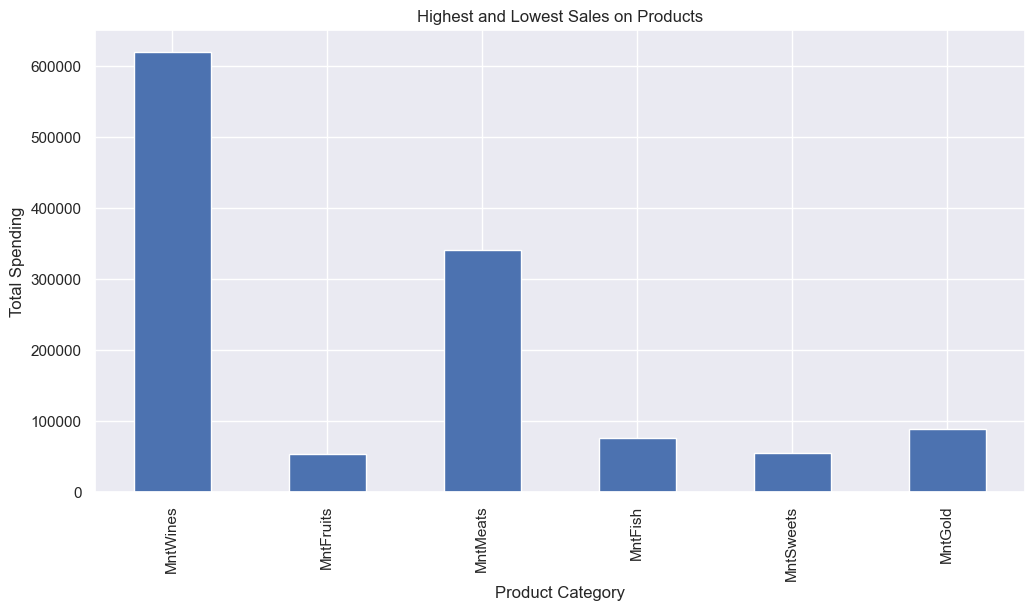

In [32]:
#1. Know the Highest and Lowest Sales 
total_spending = df[['MntWines', 'MntFruits', 'MntMeats', 'MntFish', 'MntSweets', 'MntGold']].sum()
total_spending.plot(kind='bar',figsize=(12,6))
plt.title('Highest and Lowest Sales on Products')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.show()

This bar chart visualizes the total sales of different product categories in the supermarket.
<br>

* Mnt Wines: This category has the highest sales, with a total exceeding 600,000 units. It suggests that wines are the most popular product among customers.
* Mnt Meats: The second highest in sales, with around 400,000 units sold, indicating strong customer preference.
* Other Categories: Categories such as Mnt Gold, Mnt Fish, Mnt Sweets, and Mnt Fruits have significantly lower sales, each below 100,000 units, suggesting these are less popular among customers.

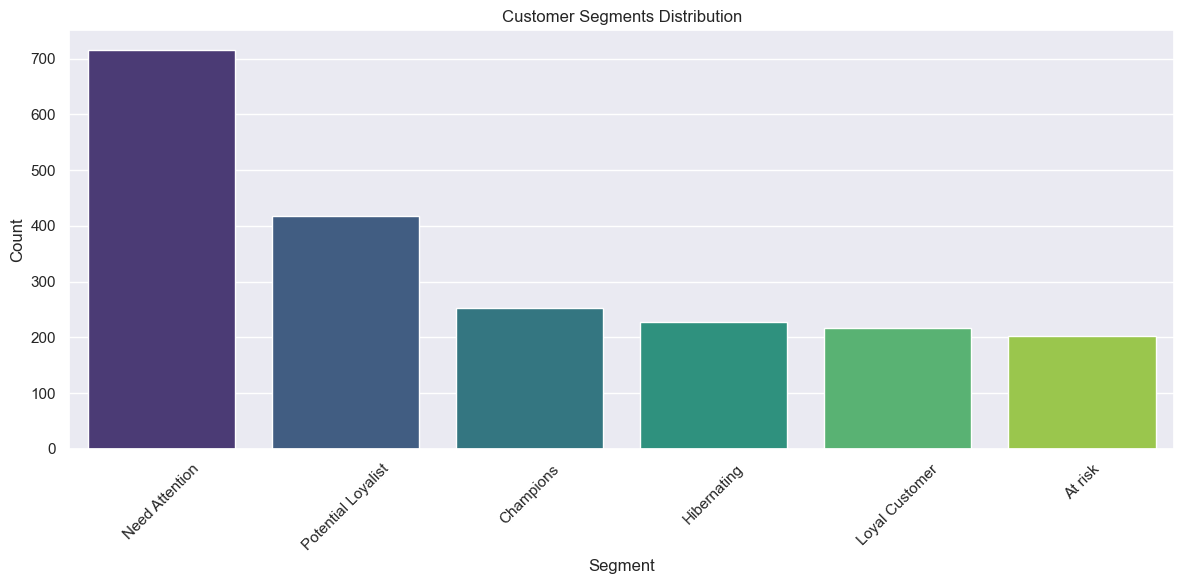

In [33]:
#2. Customer Segments Distribution
plt.figure(figsize=(12,6))
sns.countplot(x='Segment', data=df, order=df['Segment'].value_counts().index, palette='viridis')
plt.xticks(rotation=45)
plt.title('Customer Segments Distribution')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

This bar chart illustrates the number of customers in each customer segment.
<br>

* Need Attention: This segment has the highest number of customers, around 600. This indicates a large group of customers who might require re-engagement strategies to boost their loyalty and spending.
* Potential Loyalist: The second largest group, with 500 customers, suggesting they are close to becoming loyal but may need further encouragement.
* Champions, Hibernating, and Loyal Customers: These segments have a moderate number of customers, each ranging between 200 and 400.
* At Risk: This segment has the fewest customers, indicating a smaller group at risk of churning.

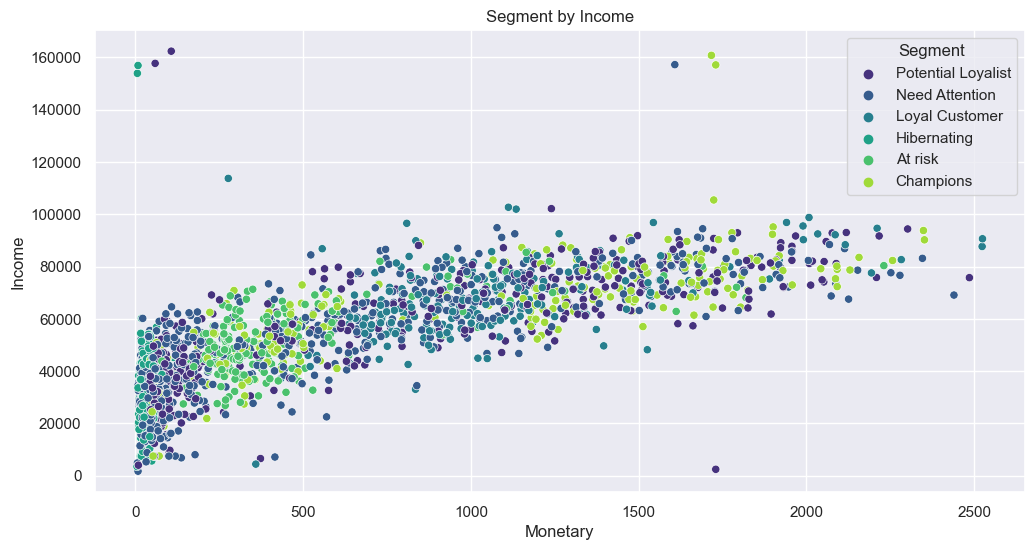

In [36]:
#3. 
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Monetary', y='Income', hue='Segment', palette='viridis')
plt.title('Segment by Income')
plt.xlabel('Monetary')
plt.ylabel('Income')
plt.show()

This scatterplot represents the income distribution across different customer segments based on monetary value.


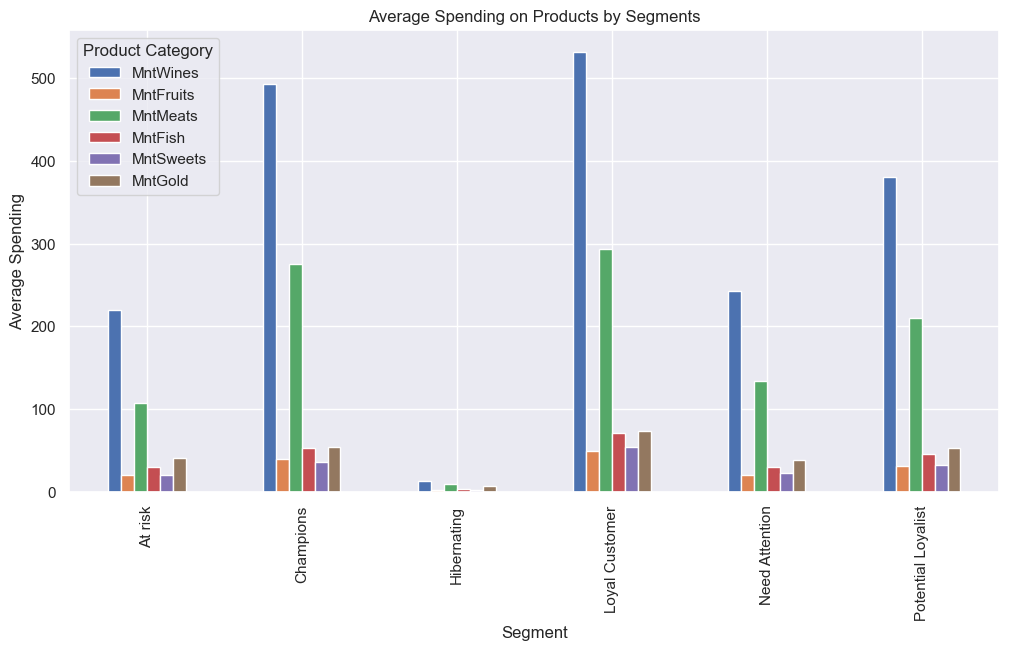

In [37]:
#4. Average spending products by each Segment
df.groupby('Segment')[['MntWines', 'MntFruits', 'MntMeats', 'MntFish', 'MntSweets', 'MntGold']].mean().plot(kind='bar',figsize=(12,6))
plt.title('Average Spending on Products by Segments')
plt.xlabel('Segment')
plt.ylabel('Average Spending')
plt.legend(title='Product Category')
plt.show()

Narasi blablablablabalblablalba....


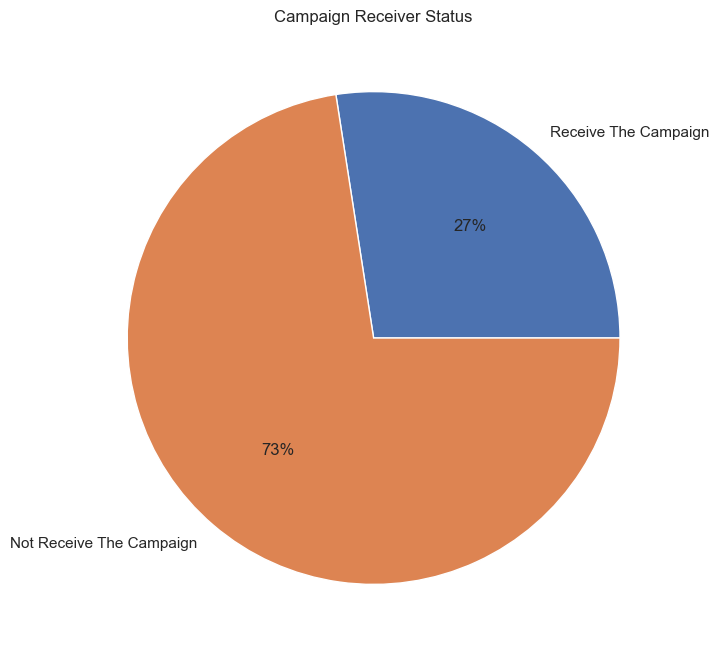

The number of customers that receive and accept the campaign is 555
The number of customers that do not receive and accept the campaign is 1467


In [38]:
# Assuming TotalCmp is a DataFrame or similar structure
# Calculate the number of customers who received and accepted the campaign
Accept = TotalCmp[[1, 2, 3, 4]].sum().sum()

# Calculate the number of customers who did not receive and accept the campaign
NotAccept = TotalCmp[[0]].sum().sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie([Accept, NotAccept], labels=['Receive The Campaign', 'Not Receive The Campaign'], autopct='%.0f%%')
plt.title("Campaign Receiver Status")
plt.show()

print(f'The number of customers that receive and accept the campaign is {Accept}')
print(f'The number of customers that do not receive and accept the campaign is {NotAccept}')

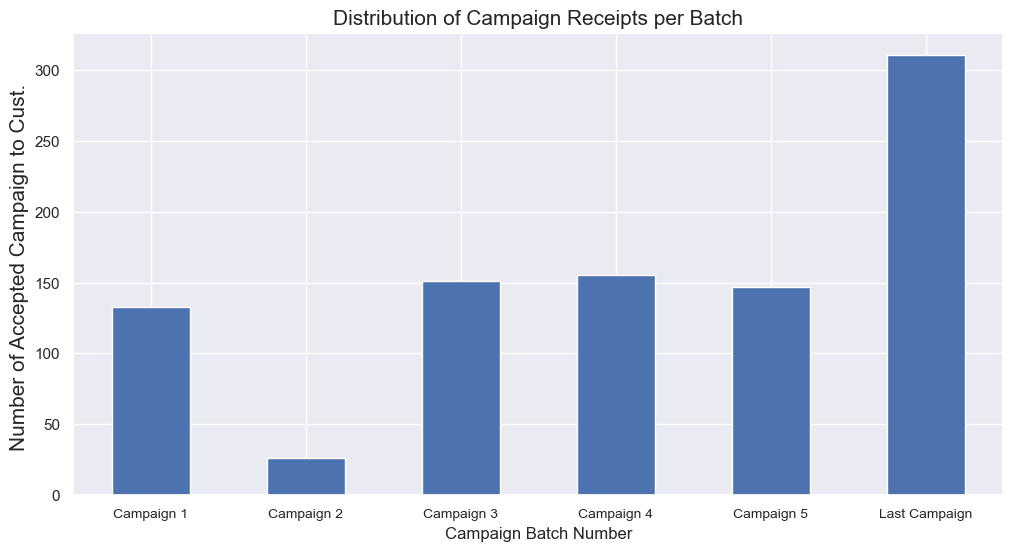

In [39]:
# campaign columns
campaignCols = ['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4', 'Campaign5', 'Response']

# plot data
df[campaignCols].sum().plot(kind='bar',figsize=(12,6))

# title
plt.title("Distribution of Campaign Receipts per Batch", fontsize=15)

# set x and y label
plt.ylabel("Number of Accepted Campaign to Cust. ", fontsize=15)
plt.xlabel("Campaign Batch Number", fontsize=12)
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last Campaign'], fontsize=10)

# rotate x label
plt.tick_params(axis='x', labelrotation=360)

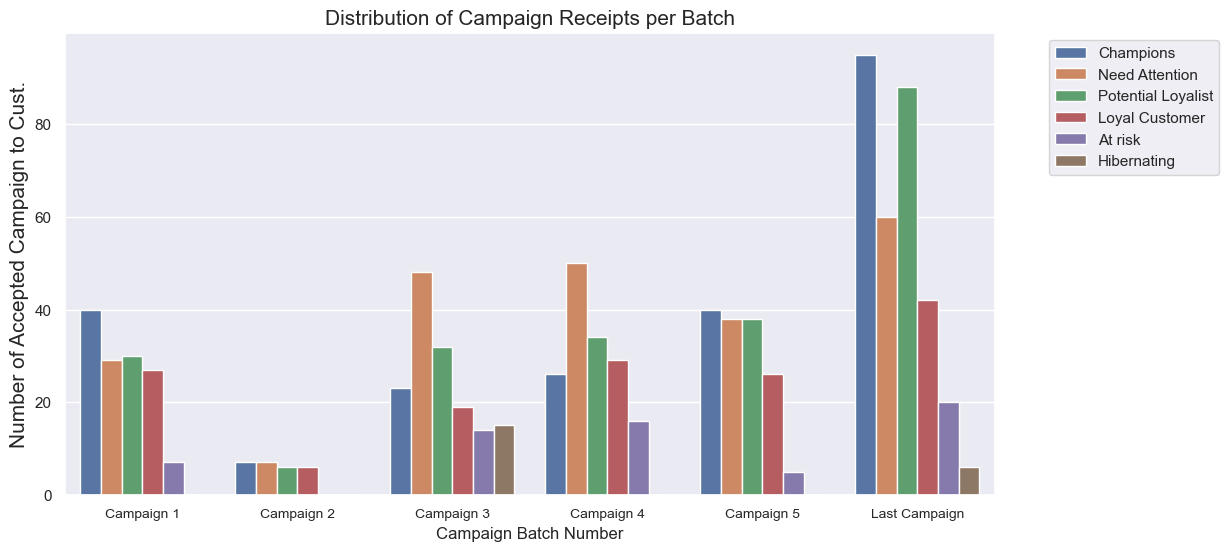

In [40]:
# Melt the DataFrame to long format for seaborn
df_melted = df.melt(id_vars=['Segment'], value_vars=campaignCols, var_name='Campaign', value_name='Count')

# Filter the data to include only accepted campaigns
df_melted = df_melted[df_melted['Count'] == 1]
#plotting
plt.figure(figsize=(12, 6))
sns.countplot(data=df_melted, x='Campaign', hue='Segment')
plt.title("Distribution of Campaign Receipts per Batch", fontsize=15)
plt.ylabel("Number of Accepted Campaign to Cust.", fontsize=15)
plt.xlabel("Campaign Batch Number", fontsize=12)
plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Campaign 1', 'Campaign 2', 'Campaign 3', 'Campaign 4', 'Campaign 5', 'Last Campaign'], fontsize=10)
plt.tick_params(axis='x', labelrotation=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [42]:
aCmp = df[['Campaign1', 'Campaign2', 'Campaign3', 'Campaign4', 'Campaign5', 'Response']].sum(axis=0)
names = ['Campaign 1','Campaign 2','Campaign 3','Campaign 4','Campaign 5','Last Campaign']

fig = px.pie(values=aCmp.values, names=names, hole=0.6,
             color_discrete_sequence=px.colors.qualitative.Vivid)
fig.update_layout(title_text='Percentage of Accepted Offers Per Campaign', title_x=0.5)

# Conclusion and Recommendations

For conclusion, our RFM analysis has provided deep insights into customer segmentation and behavior, allowing us to craft targeted marketing strategies. Key takeaways include:

* High-Value Segments: 'Champions' and 'Loyal Customers' are critical for sustained revenue growth.
* Engagement Opportunities: Significant potential exists in converting 'Potential Loyalists' and re-engaging 'Need Attention' customers.
* Campaign Effectiveness: Tailored campaigns based on RFM segments have shown promising results in improving customer engagement and sales.

Recommendations:

* Enhance Personalization: Continue refining personalized marketing efforts to cater to individual customer preferences.
* Data Quality: Invest in improving the accuracy and comprehensiveness of customer data.
* Re-engagement Strategies: Develop more robust re-engagement strategies for 'At Risk' and 'Hibernating' customers.
* Monitor and Adapt: Continuously monitor campaign performance and adapt strategies based on customer response and changing market dynamics.<br>
<br>
<br>
By leveraging these insights, we can optimize future campaigns, enhance customer loyalty, and drive growth for our supermarket chain.